In [2]:
import pandas as pd
from IPython.display import display
import matplotlib.pyplot as plt
from datetime import datetime, date
import ipywidgets as widgets


In [3]:
doctors = pd.read_csv('doctors.csv')
patients = pd.read_csv('patients.csv')
medications = pd.read_csv('medications.csv')
operations = pd.read_csv('operations.csv')

In [4]:
ages = []
patients['birth_date'] = pd.to_datetime(patients['birth_date'], dayfirst=False)

for birth_date in patients['birth_date']:
    age = ((date.today() - birth_date.date()).days) // 365
    ages.append(age)

patients['age'] = ages

patients.drop('birth_date', axis=1, inplace=True)
print(patients)

   id_p surname  age
0     1   Brown   19
1     2   Davis   44
2     3  Taylor   14


In [5]:
data = pd.merge(operations, patients, left_on='patient_id', right_on='id_p')
data = pd.merge(data, doctors, left_on='doctor_id', right_on='id_l')
data = pd.merge(data, medications, left_on='medication_id', right_on='id_m')
display(data)

,operation_id,operation_date,patient_id,doctor_id,medication_id,quantity,id_p,surname,age,id_l,name_x,id_m,name_y,dose,price
0,1,2024-12-01,1,1,1,2,1,Brown,19,1,Dr. Smith,1,Aspirin,100,10
1,2,2024-12-01,2,1,2,1,2,Davis,44,1,Dr. Smith,2,Ibuprofen,200,20
2,3,2024-12-02,1,2,3,3,1,Brown,19,2,Dr. Johnson,3,Paracetamol,500,15
3,4,2024-12-02,3,2,1,1,3,Taylor,14,2,Dr. Johnson,1,Aspirin,100,10


In [6]:
def calculate_discount():
    # Оновлюємо 'price' тільки для осіб віком менше 18 років
    data.loc[data['age'] < 18, 'price'] = data['price'] * data['quantity'] * 0.9
    display(data)

calculate_discount()

,operation_id,operation_date,patient_id,doctor_id,medication_id,quantity,id_p,surname,age,id_l,name_x,id_m,name_y,dose,price
0,1,2024-12-01,1,1,1,2,1,Brown,19,1,Dr. Smith,1,Aspirin,100,10
1,2,2024-12-01,2,1,2,1,2,Davis,44,1,Dr. Smith,2,Ibuprofen,200,20
2,3,2024-12-02,1,2,3,3,1,Brown,19,2,Dr. Johnson,3,Paracetamol,500,15
3,4,2024-12-02,3,2,1,1,3,Taylor,14,2,Dr. Johnson,1,Aspirin,100,9


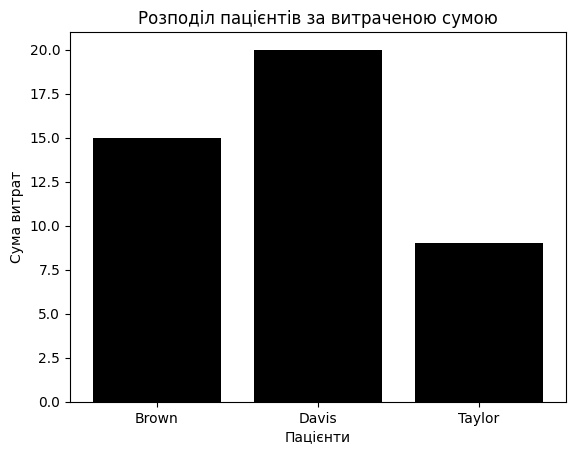

In [7]:
def bar_graph():
    plt.bar(data['surname'], data['price'], color='black')
    plt.title('Розподіл пацієнтів за витраченою сумою')
    plt.xlabel('Пацієнти')
    plt.ylabel('Сума витрат')
    plt.show()
bar_graph()

In [17]:
wd = widgets.Dropdown(
    options = data['name_y'].unique(),
    value = 'Aspirin',
    description = 'Ліки:',
    disabled = False
)

def show_changes(value):
    if value in data['name_y'].values:
        filtered_data = data[data['name_y'] == value]
        result = (filtered_data['price'] * filtered_data['quantity']).sum()
        print(f'Сума витрат на ліки категорії {value}: {result}')

widget = widgets.interactive(show_changes, value=wd)

display(widget)
        

interactive(children=(Dropdown(description='Ліки:', options=('Aspirin', 'Ibuprofen', 'Paracetamol'), value='As…

In [18]:
df = pd.read_csv('doctors.csv')

class DOCTOR:
    def __init__(self,id,surname):
        self._id=id
        self._surname=surname

    @property
    def id(self):
        return self._id
    
    @id.setter
    def id(self,value):
        self._id=value

    @property
    def surname(self):
        return self._surname
    
    @surname.setter
    def surname(self,value):
        self._surname=value

doctor = [DOCTOR(row['id_l'], row['name']) for _, row in df.iterrows()]
for d in doctor:
    print(f'ID: {d.id}, surname: {d.surname}')

ID: 1, surname: Dr. Smith
ID: 2, surname: Dr. Johnson


In [19]:
import unittest

class TestDoctor(unittest.TestCase):
    def setUp(self):
        self.doctor = DOCTOR(1, 'Joe')
    def test_get_id(self):
        self.assertEqual(self.doctor.id,1)
    def test_get_surname(self):
        self.assertEqual(self.doctor.surname,'Joe')
    def test_set_id(self):
        self.doctor.id = 2
        self.assertEqual(self.doctor.id,2)
    def test_set_surname(self):
        self.doctor.surname = 'Paul'
        self.assertEqual(self.doctor.surname, 'Paul')
if __name__ == '__main__':
    unittest.main(argv=[''], exit=False)

....
----------------------------------------------------------------------
Ran 4 tests in 0.004s

OK
